In [40]:
install.packages('rpart')

In [ ]:
install.packages('rpart.plot')



Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
install.packages('caret')

also installing the dependencies ‘future’, ‘future.apply’, ‘lava’, ‘survival’, ‘prodlim’, ‘mgcv’, ‘scales’, ‘tibble’, ‘class’, ‘dplyr’, ‘hardhat’, ‘ipred’, ‘lifecycle’, ‘lubridate’, ‘Matrix’, ‘purrr’, ‘tidyr’, ‘tidyselect’, ‘stringr’, ‘ggplot2’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘nlme’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
library(rpart)
library(rpart.plot)
# library(caret)

In [61]:
data = read.csv("laptop_price.csv", stringsAsFactors=TRUE)
dim(data)

[1] 1303   13

In [62]:
str(data)

'data.frame':	1303 obs. of  13 variables:
 $ laptop_ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Company         : Factor w/ 19 levels "Acer","Apple",..: 2 2 8 2 2 1 2 2 3 1 ...
 $ Product         : Factor w/ 618 levels "110-15ACL (A6-7310/4GB/500GB/W10)",..: 302 300 51 302 302 59 302 300 615 431 ...
 $ TypeName        : Factor w/ 6 levels "2 in 1 Convertible",..: 5 5 4 5 5 4 5 5 5 5 ...
 $ Inches          : num  13.3 13.3 15.6 15.4 13.3 15.6 15.4 13.3 14 14 ...
 $ ScreenResolution: Factor w/ 40 levels "1366x768","1440x900",..: 24 2 9 26 24 1 26 2 9 16 ...
 $ Cpu             : Factor w/ 118 levels "AMD A10-Series 9600P 2.4GHz",..: 55 53 64 75 57 15 74 53 96 73 ...
 $ Ram             : Factor w/ 9 levels "12GB","16GB",..: 9 9 9 2 9 6 2 9 2 9 ...
 $ Memory          : Factor w/ 39 levels "1.0TB HDD","1.0TB Hybrid",..: 5 3 17 30 17 27 16 16 30 17 ...
 $ Gpu             : Factor w/ 110 levels "AMD FirePro W4190M",..: 59 52 54 10 60 18 61 52 98 62 ...
 $ OpSys           : Factor w/ 9 levels "

In [63]:
head(data)
names(data)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
6,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00


[1] "laptop_ID"        "Company"          "Product"          "TypeName"        
 [5] "Inches"           "ScreenResolution" "Cpu"              "Ram"             
 [9] "Memory"           "Gpu"              "OpSys"            "Weight"          
[13] "Price_euros"

In [64]:
sum(is.na(data))

[1] 0

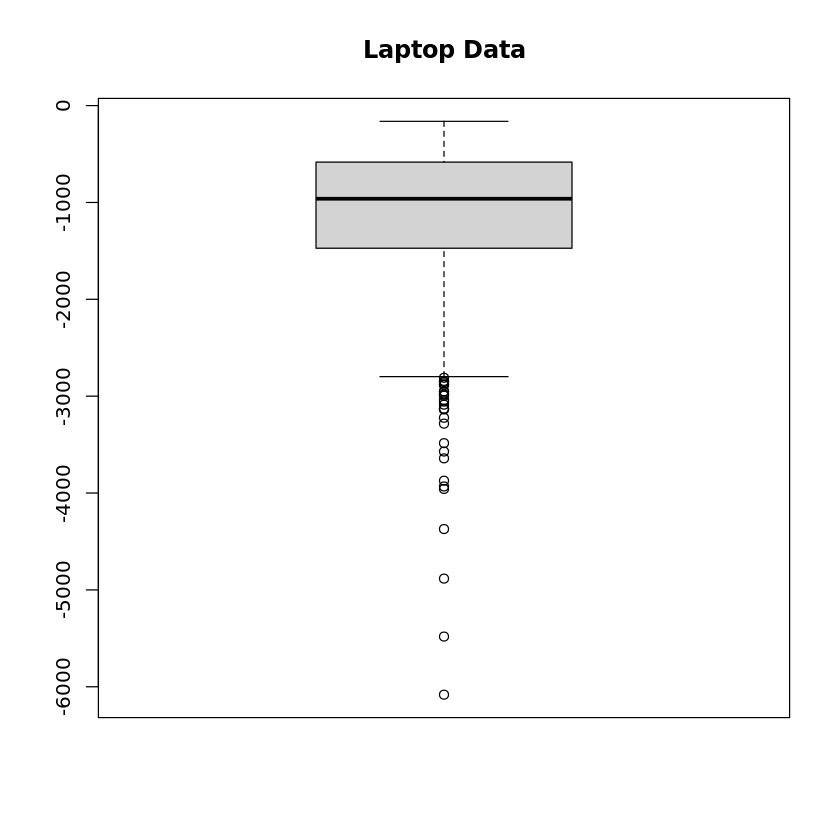

In [65]:
boxplot(data$Inches - data$Price_euros, main="Laptop Data")

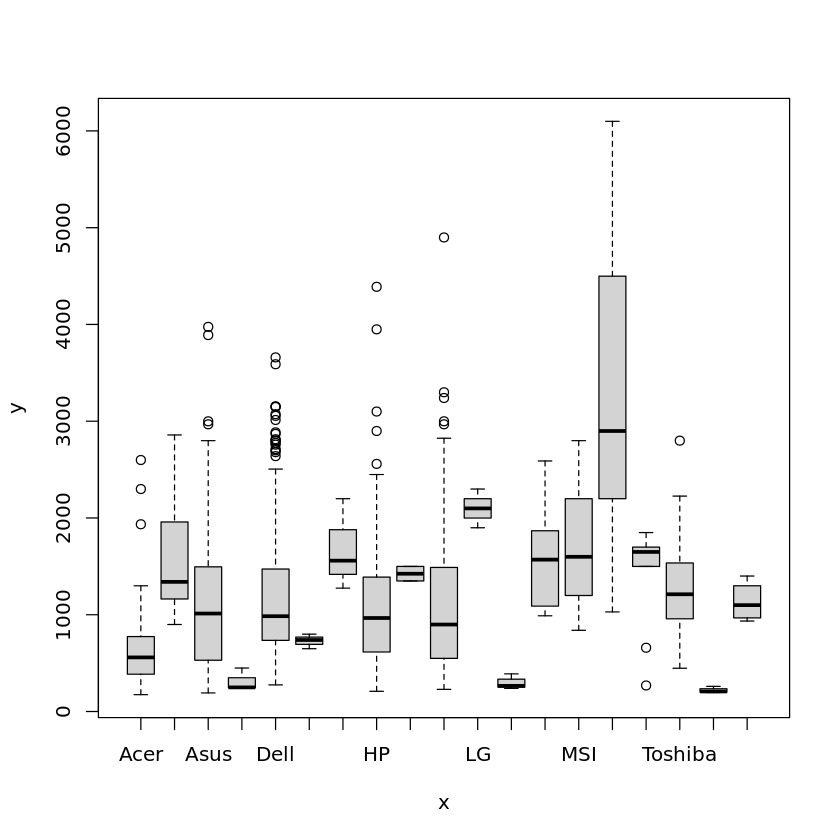

In [73]:
plot(data$Company, data$Price_euros)

In [79]:
aov_result = aov(data$Price_euros ~ data$Company, data)
summary(aov_result)

               Df    Sum Sq Mean Sq F value Pr(>F)    
data$Company   18 104013991 5778555   13.94 <2e-16 ***
Residuals    1284 532160971  414456                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

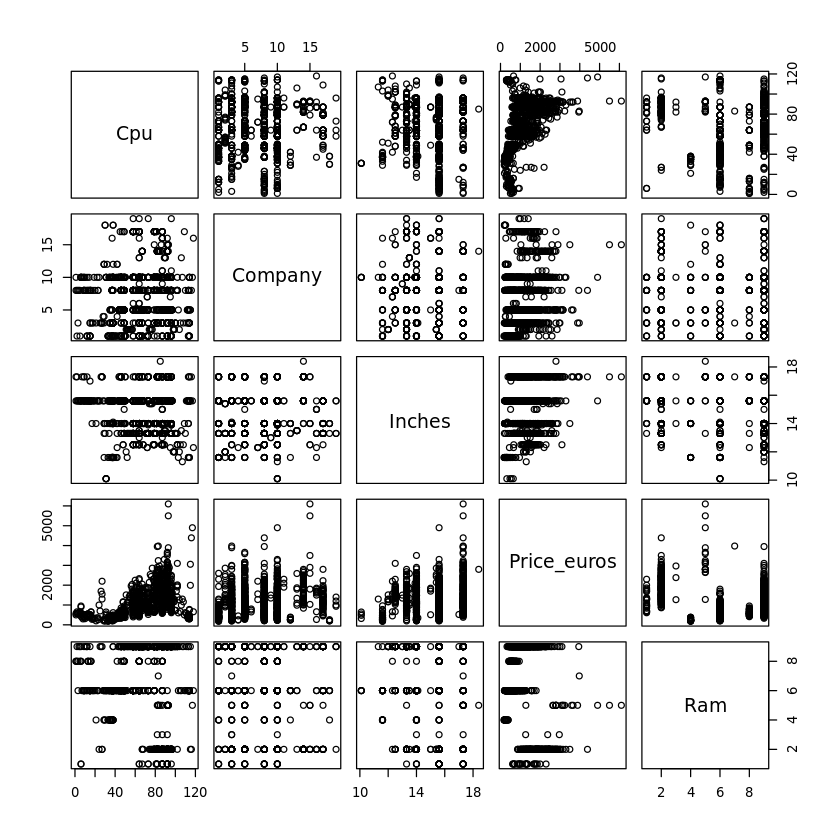

In [105]:
pairs(data[,c(7,2,5,13,8)])

In [85]:
cor_res = cor(data[,5], data[, 13])
cor_res
summary(cor_res)

[1] 0.06819667

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0682  0.0682  0.0682  0.0682  0.0682  0.0682 

In [97]:
# Regression
model1 = lm(data$Price_euros - data$Inches + data$Company)
model1

Warning message in Ops.factor(data$Price_euros - data$Inches, data$Company):
“‘+’ not meaningful for factors”


ERROR: Error in formula.default(object, env = baseenv()): invalid formula


In [93]:
levels(data$Company)[c(2,2,2,2)]

[1] "Apple" "Apple" "Apple" "Apple"

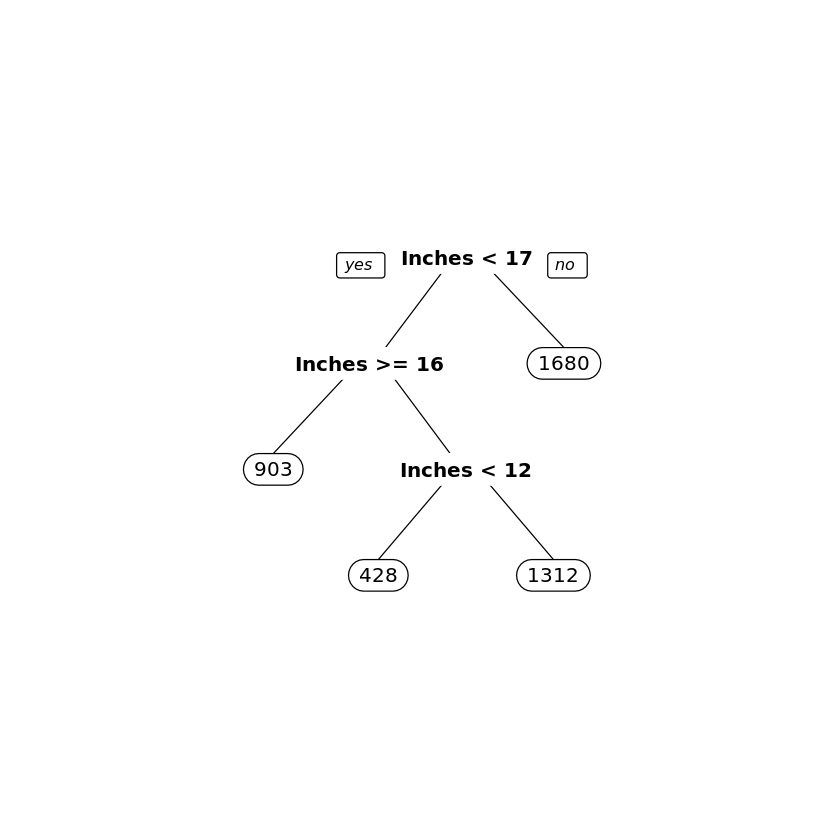

In [99]:
price_model1 = rpart(Price_euros ~ Inches, data=data)
prp(price_model1)

In [102]:
summary(price_model1)

Call:
rpart(formula = Price_euros ~ Inches, data = data)
  n= 1303 

          CP nsplit rel error    xerror       xstd
1 0.09186896      0 1.0000000 1.0007322 0.06983676
2 0.04965649      1 0.9081310 0.9126083 0.05736910
3 0.04288440      2 0.8584745 0.8618543 0.05824329
4 0.01000000      3 0.8155902 0.8210452 0.05801130

Variable importance
Inches 
   100 

Node number 1: 1303 observations,    complexity param=0.09186896
  mean=1123.687, MSE=488238.7 
  left son=2 (1138 obs) right son=3 (165 obs)
  Primary splits:
      Inches < 17.15 to the left,  improve=0.09186896, (0 missing)

Node number 2: 1138 observations,    complexity param=0.04965649
  mean=1043.043, MSE=365930.7 
  left son=4 (666 obs) right son=5 (472 obs)
  Primary splits:
      Inches < 15.5  to the right, improve=0.07585978, (0 missing)

Node number 3: 165 observations
  mean=1679.885, MSE=977582.7 

Node number 4: 666 observations
  mean=902.7814, MSE=303255.8 

Node number 5: 472 observations,    complexity param=0.